<a href="https://colab.research.google.com/github/nairsatish/4540/blob/master/Data_Science_Camp_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**
Developed by Logan Brenningmeyer who was an undergraduate student in the 4540 course during Spring 2023

### **Notation**

Here's some notation to describe elements of the optimization problem.

$θ$ — Vector (list) of the model's parameters (like $m$ and $b$ in linear regression)
<br>
$h(θ)$ — The hypothesis function that takes the parameters $\theta$ as input and outputs it's prediction $\hat{y}$.
<br>
$L(\theta)$ — The optimization function or loss function like mean squared error.
<br>
$X$ — A vector of the input features, i.e. a list of the input data like $x$ in linear regression.
<br>
$\hat{y}$ — The model's output. In linear regression, $y$ is the model's guess at the observed (actual) y-value. In logistic regression, $y$ is the model's guess at the *class* of the input, like class $0$ or $1$.


### **StatQuest Video - Linear Regression**

This video covers the basics of linear regression, watch this for review before moving onto logistic regression.

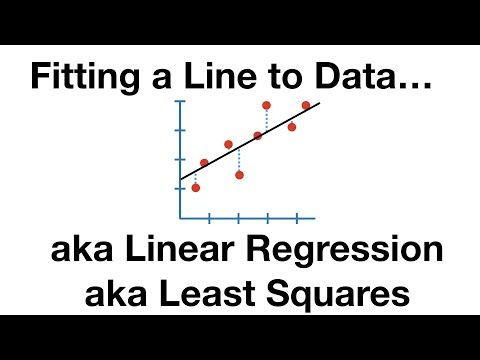

In [ ]:
#@title

from IPython.display import YouTubeVideo
YouTubeVideo('PaFPbb66DxQ')

### **Review**

Before we dive into logistic regression, let's review some concepts you should be familiar with.
<br></br>
***Linear regression*** is an *optimization* problem, meaning it's concerned with finding the best—or optimal—solution. The computer attempts to find the line of best fit that matches the dataset closest.
<br>
***Logistic regression***, on the other hand, is a *classification* problem, meaning it classifies data based on its features (e.g. classifying a photo of a dog or a cat).
<br></br>
In linear regression, the computer's guess—or ***hypothesis***—is a straight line in the standard form $\hat{y_i}=mx_i+b$. For every x-value $x_i$ in the dataset, the computer's guess of the y-value $\hat{y_i}$ is determined by the hypothesis line.
<br></br>
To find the accuracy of the hypothesis, linear regression uses a ***loss function*** to calculate the overall error of the hypothesis compared to the observed data.
<br>
One such loss function is ***mean squared error (MSE)***. MSE calculates the average ***error*** between each observed data point and the hypothesis' prediction, returning a number that represents the overall inaccuracy—or loss—of the hypothesis.

$$\text{Mean Squared Error (MSE)}$$
$$L = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
$L$ = Loss
<br>$n$ = # of data points
<br>$y_i$ = observed y-value
<br>$\hat{y_i}$ = predicted y-value
<br></br>
To make the hypothesis fit the data best, you must *minimize loss*. To do this, you must adjust the hypothesis' parameters $m$ and $b$ in the direction that decreases loss.
<br>
This process is known as ***gradient descent***, sliding down the slope of the loss curve with respect to the hypothesis' parameters until loss is minimized.
<br>

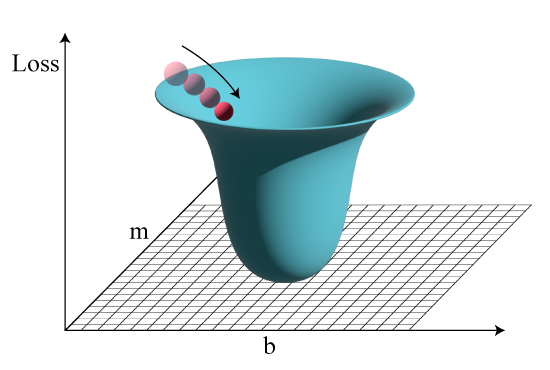

Updating the parameters of the hypothesis involves following an ***update rule***. The update rule adjusts the parameters in the negative direction of the gradient (down the loss slope) at a speed controlled by a ***learning rate***.

$$\text{Update Rule}$$
$$\theta_i = \theta_i - \alpha*\frac{∂L}{∂\theta_i}$$
$\theta_i$ = the $i^{th}$ parameter ($\theta_0 = b$, $\theta_1 = m$ in linear regression)
<br>
$\alpha$ = the learning rate (controls how quickly it descends the gradient)
<br>
$\frac{∂L}{∂\theta_i}$ = the slope of the loss with respect to the parameter $\theta_i$

### **Review Activity - Mean as an Optimization Problem**

Can you pose finding the mean of four numbers $1$, $3$, $5$, and $7$ as an optimization problem?

Hint: $\theta$ is what you are changing to optimize the solution.
<br>
How should you define your loss function, $L(\theta)$? (what you are trying to *minimize*)
<br>
How do you find the minimum of $L(\theta)$?

Challenge: Can you imagine pseudocode that could automate this optimization problem?

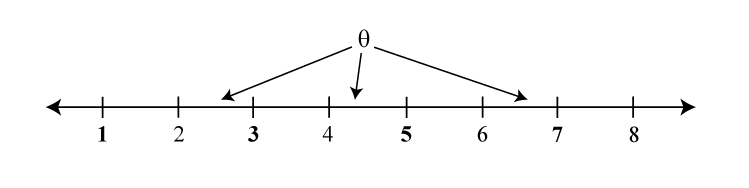

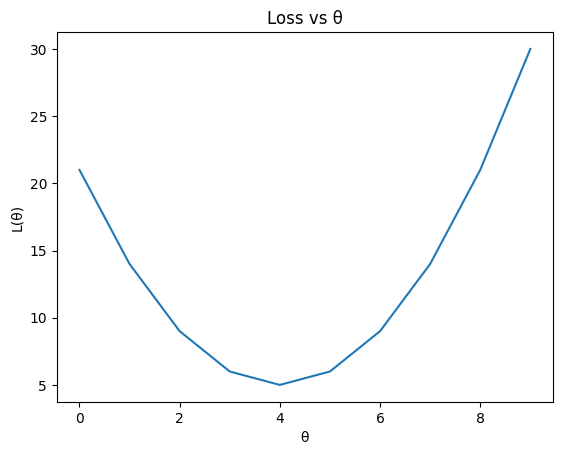

In [ ]:
#@title Solution (only run/show code when you are done)

'''

In optimization problems, you find the optimal solution by adjusting the parameters, θ.
In this case, your hypothesis only involves guessing a 1D number, not a 2D line.
Therefore, instead of the hypothesis being the equation of a line, it is h(θ) = θ.

Let's choose mean squared error (MSE) as the loss function.
In the 2D linear regression case, error = (y_i - y_hat_i), the distance between the real y-value and predicted y-value.
In this 1D case, error = (x_i - h(θ)), the distance between each number on the number line (x_i) and the predicted mean (h(θ)).
  - Key Idea: The mean of any set of numbers is the value with the minimum average distance to every number.

L(θ) = 1/n * sum((x_i - h(θ))^2)

To begin training we choose random parameters, so let's set θ to 5.

Next, we plug θ into the hypothesis h(θ).
In this case, h(θ) = θ, meaning θ represents the model's guess for the mean and h(θ) = 5.

Now we can find the mean squared error of the model.

X = [1, 3, 5, 7]
n = 4
h(θ) = 5

L(θ) = 1/4 * sum((x_i - h(θ))^2)
     = 1/4 * [(1 - 5)^2 + (3 - 5)^2 + (5 - 5)^2 + (7 - 5)^2]
     = 1/4 * (16 + 4 + 0 + 4)
     = 1/4 * 24
     = 6

We can plot L(θ) for many different θs to see where the loss curve is minimized.
Take a look at the code below to see the gradient of loss with respect to the parameter, θ.

'''
# For plotting
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------#

# Mean Squared Error (MSE)
# Finds the average squared error between x_i and θ for each x_i in X
def MSE(X, theta):
  return 1/len(X) * sum([(x_i - theta)**2 for x_i in X])

#-----------------------------------------------------------------------#

theta = 0
X = [1, 3, 5, 7]
n = 4

# Array to store the loss for each theta
loss = []

# Calculate the loss for each θ from 0 to 9
for epoch in range(10):
  loss.append(MSE(X, theta))
  theta += 1

#-----------------------------------------------------------------------#

fig, ax = plt.subplots()

ax.plot(range(10), loss)
ax.set_title('Loss vs θ')
ax.set_xlabel('θ')
ax.set_ylabel('L(θ)')

plt.show()


### **StatQuest Video - Logistic Regression**

Watch this video for an overview of logistic regression before moving on.

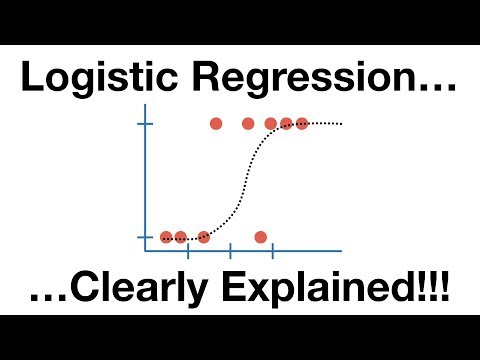

In [ ]:
#@title

from IPython.display import YouTubeVideo
YouTubeVideo('yIYKR4sgzI8')

### **Classification**

In linear regression, the computer uses a line to *fit* the data.
<br>
In ***logistic regression***, the computer uses a line to *split* the data into two classes.

The goal of logistic regression is to define a line so that data in one class falls on one side of the line and data in the other class falls on the other side.
<br>
In the image below, the blue hypothesis line splits the two black and red classes. This means that the model believes that any point that falls *above* the line is part of the black class, and any point that falls *below* the line is part of the red class.

(The coordinates $x_1$ and $x_2$ are the input features. There can be many more than two input features, so they are referred to as $x_0, x_1, x_2...x_n$)

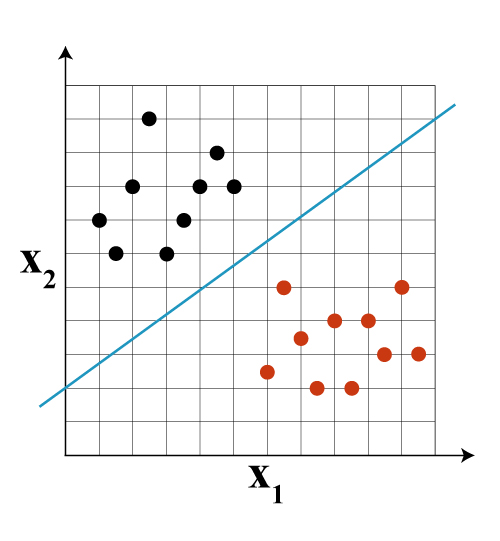

**Challenge: What does it mean *mathematically* for a point to fall above or below the hypothesis line?**

### **Big Picture - Logistic Regression**

In a classification problem, each data point comes in the form ($X_i$, $y_i$), where $X_i$ is the $i^{th}$ input feature vector ($x_0$, $x_1$, $x_2$...$x_n$) and $y_i$ is the data's classification, $0$ or $1$.
<br></br>
For example, let's look at the data below.

<table width=25%>
  <tr>
    <th colspan=2>$X$</th>
    <th>$y$</th>
  </tr>
  <tr>
    <th>$x_1$</th>
    <th>$x_2$</th>
    <th>$y_i$</th>
  </tr>
  <tr>
    <td align=center>$-2$</td>
    <td align=center>$1$</td>
    <td align=center>$0$</td>
  </tr>
  <tr>
    <td align=center>$-1$</td>
    <td align=center>$3$</td>
    <td align=center>$1$</td>
  </tr>
  <tr>
    <td align=center>$-1$</td>
    <td align=center>$-1$</td>
    <td align=center>$0$</td>
  </tr>
  <tr>
    <td align=center>$2$</td>
    <td align=center>$-2$</td>
    <td align=center>$0$</td>
  </tr>
  <tr>
    <td align=center>$2$</td>
    <td align=center>$1$</td>
    <td align=center>$1$</td>
  </tr>
  <tr>
    <td align=center>$3$</td>
    <td align=center>$-1$</td>
    <td align=center>$1$</td>
  </tr>
</table>

As you see in the table, $X$ represents *all* of the ($x_1$, $x_2$) pairs in the dataset.
<br>
Each input feature vector $X_i$ (($x_1$, $x_2$) pair) is assigned a class $y_i$ ($0$ or $1$).
<br>
The model's goal is to learn how to classify a data point as $0$ or $1$ based on its features. Here, the features are just 2D coordinates, but in larger problems there may be dozens of features like weight, height, temperature, or any other metric you can think of.
<br></br>
Let's take a look at this data on a graph (Class $0$ = blue, Class $1$ = red):

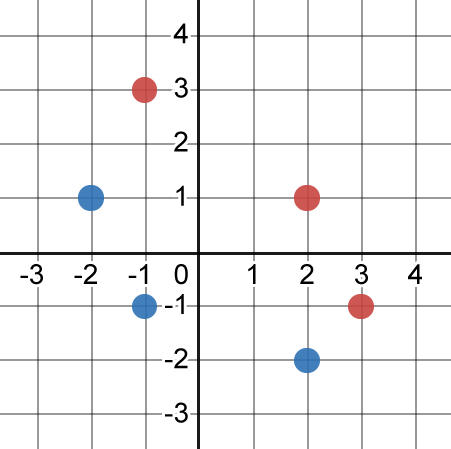

### **Activity - Frame The Problem**

Consider the 2D logistic regression problem shown above. How might we frame the problem to define a line that splits the two classes optimally?
<br>
What is loss in this problem and how would we minimize it?
<br></br>
Write down your thoughts before moving forward.

## **The Perceptron**

The ***perceptron*** is the answer to all our classification problems. It is the fundamental unit of a neural network—like a neuron in the brain.

The job of a perceptron is simple: take inputs in ($x_1, x_2, x_3...x_n$) and compute an output, $0$ or $1$ ($\hat{y_i}$).

The perceptron, by definition, uses a step function to return either $0$ or $1$ exclusively rather than the sigmoid function as described in the image.

Logistic regression alters the perceptron by using a different activation function like the ***sigmoid function $\sigma(z)$***. The sigmoid function returns a *probability* between $0$ and $1$ rather than strictly outputting the classification like a traditional perceptron.

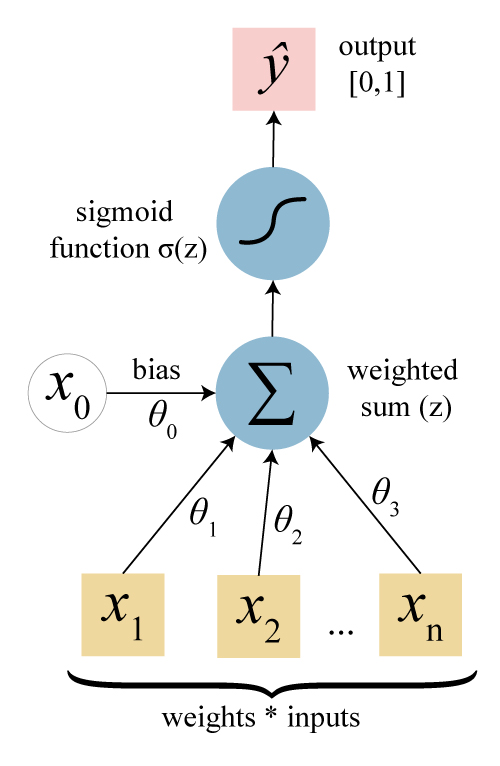
<br></br>
### **Weights and Bias**

The perceptron uses ***weights*** and ***bias*** to adjust its computation to produce more accurate outputs. These are the line's parameters like slope and the y-intercept that are adjusted during training.
<br>
Recall, in linear regression the hypothesis' output is defined as $\hat{y_i}=mx_i + b$. Here, $m$ is the *weight* because it multiplies the input $x_i$, while $b$ is the *bias* which is simply added on. Bias is actually also multiplied by the input $x_0$, but $x_0=1$ always by default.
<br></br>
### **Weighted Sum**

When the inputs ($x_0, x_1, x_2, x_3...x_n$) are taken in, the perceptron calculates $z$, the ***weighted sum***. The weighted sum is the dot product of the weights and inputs plus the bias ($z=\theta_0x_0 + \theta_1x_1 + \theta_2x_2 +...+\theta_nx_n$).
<br></br>
To understand what $z$ means better, let's look back at the 2D example with red and blue circles.
<br>
In this problem, there are two features, $x_1$ ($x$) and $x_2$ ($y$).
<br>
A line in the 2D plane can be defined by:
$$x_2=mx_1+b$$
<br>
Move all variables to one side:
$$x_2-mx_1-b=0$$
<br>
Now, we can change $m$ and $b$ to $\theta$ notation for the weights and biases.
$$\theta_2x_2+\theta_1x_1+\theta_0=0$$
$$...$$
$$\theta_2x_2+\theta_1x_1+\theta_0=z$$
<br>
So, what does this weighted sum mean? Just like linear regression, it defines a line given some parameters ($\theta_i$).
<br>
If a data point ($x_1, x_2$) from the dataset lies on the line, $z=0$.
<br>
If a data point lies *above* the line, $z>0$.
<br>
If a data point lies *below* the line, $z<0$.
<br>

**Whether a data point's $z$ value is negative or nonnegative determines the model's classification of that point.**
<br></br>
### **Sigmoid Function**

Though the weighted sum ($z$) determines how to classify a data point, we must use an ***activation function*** called the ***sigmoid function*** to *squash* the weighted sum between $0$ and $1$.

$$\text{Sigmoid Function}$$
$$\sigma(z)=\frac{1}{1+e^{-z}}$$

If $z$ is a large *negative* number, $e^{-z}$ becomes a very large *positive* number, making the output close to $0$.
If $z$ is a large *positive* number, $e^{-z}$ becomes very close to $0$, making the output close to $1$.
If $z=0$, the $\sigma(z)=0.5$.
<br></br>
In essence, the more *positive* $z$ is, the closer $\sigma(z)$ is to $1$. The more *negative* $z$ is, the closer $\sigma(z)$ is to $0$.

If $\sigma(z)>=0.5$, the data point is classified as a $1$.
<br>
If $\sigma(z)<0.5$, the data point is classified as a $0$.


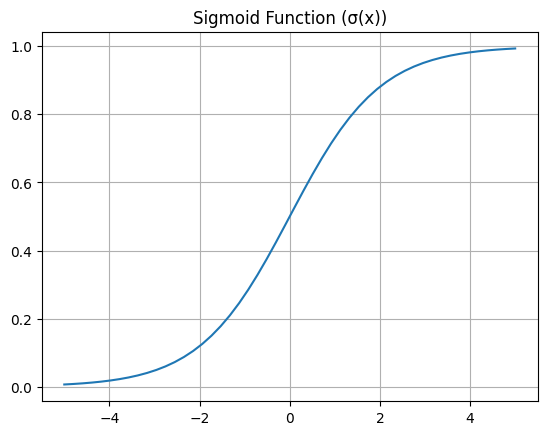

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1 + np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid(x)

fig, ax = plt.subplots()

ax.set_title('Sigmoid Function (σ(x))')

ax.plot(x, y);


### **Activity - Calculate Weighted Sum**

Pick random numbers for $\theta_0$, $\theta_1$, and $\theta_2$.
<br>
Plot the line using the $z$ equation:
$$\theta_2x_2+\theta_1x_1+\theta_0=0$$
<br>
Choose $(x_1, x_2)$ coordinates that lie above, on, and below the line and calculate their $z$ value.
<br>
Do your calculations make sense according to the purpose of the weighted sum?
<br></br>

Z-values for points Above the line: [3.94081425 5.05916766 5.9566611  5.45313452 5.6921435 ]
Z-values for points On the line: [0. 0. 0. 0. 0.]
Z-values for points Below the line: [-3.82920243 -4.43356378 -5.68314895 -3.77213022 -4.80815215]


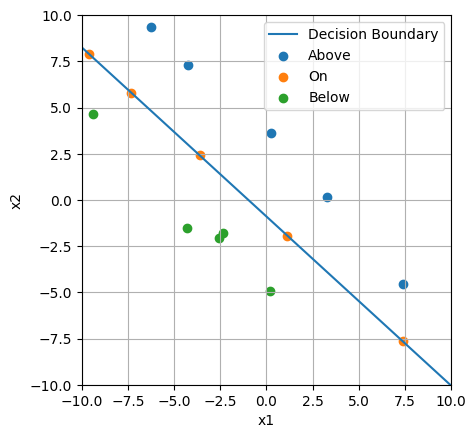

In [ ]:
#@title Run this code once you have finished the activity

from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
np.random.seed()

# Randomly initialize weights and bias
theta_0 = np.random.uniform(1, 2)
theta_1 = np.random.uniform(1, 2)
theta_2 = np.random.uniform(1, 2)

# Generate x1 values
x1 = np.linspace(-10, 10, 400)

# Calculate x2 values
# θ0 + θ1x1 + θ2x2 = 0
# θ2x2 = -θ1x1 - θ0
# x2 = (-θ1x1 - θ0)/θ2
x2 = (-theta_1 * x1 - theta_0) / theta_2

fig, ax = plt.subplots()

# Plot the decision boundary
ax.plot(x1, x2, 'tab:blue', label='Decision Boundary')

# Generate random coordinates for points above, on and below the line
points_above = np.random.uniform(low=-10, high=10, size=(5, 1))
points_above = np.column_stack((points_above, ((-theta_1 * points_above - theta_0) / theta_2) + np.random.uniform(3,5, size=(5,1))))

points_on = np.random.uniform(low=-10, high=10, size=(5, 1))
points_on = np.column_stack((points_on, (-theta_1 * points_on - theta_0) / theta_2))

points_below = np.random.uniform(low=-10, high=10, size=(5, 1))
points_below = np.column_stack((points_below, ((-theta_1 * points_below - theta_0) / theta_2) - np.random.uniform(3,5, size=(5,1))))

# Plot the points
ax.scatter(*points_above.T, label='Above')
ax.scatter(*points_on.T, label='On')
ax.scatter(*points_below.T, label='Below')

# Calculate and print z values
for label, points in [('Above', points_above), ('On', points_on), ('Below', points_below)]:
    z_values = theta_0 + theta_1 * points[:, 0] + theta_2 * points[:, 1]
    print(f'Z-values for points {label} the line: {z_values}')

# Set plot limits and labels
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.grid()
ax.set_aspect('equal', adjustable='box')
ax.legend()

plt.show()


### **Loss Function**

There are many loss functions to choose from for logistic regression, but let's use mean squared error (MSE) again to keep things simple.

Typically, a loss function known as ***Cross-Entropy*** is used for logistic regression as it properly interprets the sigmoid output as a *probability*. However, to keep things simple, we'll just use MSE.
<br></br>
Just as in linear regression, we want to first find the *error* ($y_i-\hat{y_i}$) for each data point—the difference between the target value ($0$ or $1$) and the model's guess (some decimal $0$→$1$). Remember that the model's output is the result of the sigmoid function, $\sigma(z)$.

Once again, we'll square the errors and find their average to calculate the overall loss.

$$\text{Mean Squared Error (MSE)}$$
$$L(\theta)=\frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}$$

To iterate again, $\hat{y_i}$ is the result of applying the sigmoid function $\sigma()$ to the weighted sum $z$, making the following equations equivalent.

$$L(\theta)=\frac{1}{n}\sum_{i=1}^{n}{(y_i-\sigma(z_i))^2}$$

$$L(\theta)=\frac{1}{n}\sum_{i=1}^{n}{(y_i-\sigma(\theta_0x_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n))^2}$$

To train and optimize the logistic regression model, the weights and biases ($\theta$) must be updated in the direction that minimizes loss with ***gradient descent***, just as in linear regression.
<br></br>

### **Update Rule**

Parameters (weights and bias) are updated with the standard update rule, descending the loss' slope with respect to the parameters ($\frac{∂L}{∂\theta_i}$) at a specified learning rate ($\alpha$).

$$\text{Update Rule}$$
$$\theta_i = \theta_i - \alpha*\frac{∂L}{∂\theta_i}$$

### **Logistic Regression With sklearn**

Using the machine learning library sklearn (sci-kit learn), we can solve the logistic regression problem from earlier with the blue and red circles.

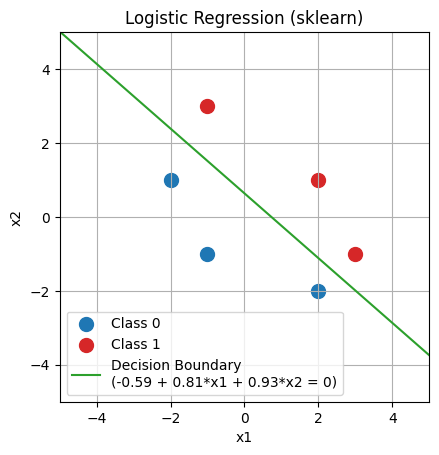

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------#

# Data

# Input features
X = np.array(
    [[-2, 1],
     [-1, 3],
     [-1, -1],
     [2, -2],
     [2, 1],
     [3, -1]])

# Target classes
y = np.array([0, 1, 0, 0, 1, 1])

#------------------------------------------------#

# Create a LogisticRegression model
model = LogisticRegression()

# Fit the model to the dataset
model.fit(X, y)

#------------------------------------------------#

# Plotting

fig, ax = plt.subplots()

# Separate data by class
classes = {0: [], 1: []}
data = zip(X, y)
for x_i, y_i in zip(X, y):
  classes[y_i].append(x_i)

# Plot dataset
ax.scatter(*np.asarray(classes[0]).T, color='tab:blue', s=100, label='Class 0')
ax.scatter(*np.asarray(classes[1]).T, color='tab:red', s=100, label='Class 1')

# Plot decision boundary
# Get θ-values from the model
theta_0 = model.intercept_[0]
theta_1, theta_2 = model.coef_[0]

x_in = np.linspace(-5, 5, 100)
y_pred = (-theta_1 * x_in - theta_0) / theta_2

ax.plot(x_in, y_pred, color='tab:green', label=f'Decision Boundary\n({theta_0:.2f} + {theta_1:.2f}*x1 + {theta_2:.2f}*x2 = 0)')

ax.grid()
ax.set_title('Logistic Regression (sklearn)')
ax.set_aspect(aspect='equal', adjustable='box')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower left')

plt.show()

### **Logistic Regression With PyTorch**

Let's solve the same problem with the PyTorch library.

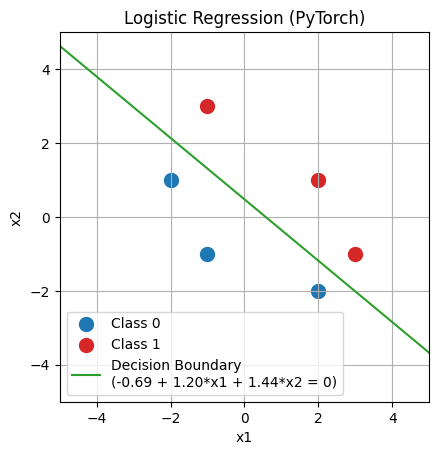

In [ ]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------#

# Data

# Input features
X = torch.tensor(
    [[-2.0, 1.0],
     [-1.0, 3.0],
     [-1.0, -1.0],
     [2.0, -2.0],
     [2.0, 1.0],
     [3.0, -1.0]])

# Target classes
y = torch.tensor([0.0, 1.0, 0.0, 0.0, 1.0, 1.0]).view(-1, 1)

#------------------------------------------------#

# Define a LogisticRegression model
class LogisticReg(torch.nn.Module):
  def __init__(self):
    super(LogisticReg, self).__init__()
    self.linear = torch.nn.Linear(2,1)

  def forward(self, X):
    # Compute weighted sum
    z = self.linear(X)
    # Apply sigmoid function to obtain prediction
    return torch.sigmoid(z)

# Create a LogisticReg object
model = LogisticReg()

# Define a loss function (mean squared error) and optimizer (gradient descent)
loss_function = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

# Fit the model
for epoch in range(500):
  # Feed inputs into model to get predictions
  y_pred = model(X)

  # Calculate loss
  loss = loss_function(y_pred, y)

  # Reset gradients to zero to prepare for calculations
  optimizer.zero_grad()
  # Calculate gradients
  loss.backward()
  # Update parameters
  optimizer.step()

#------------------------------------------------#

# Plotting

fig, ax = plt.subplots()

# Convert from tensors to numpy arrays for plotting
X_np = X.numpy()
y_np = y.numpy().T[0]
y_pred_np = model(X).detach().numpy()

# Sort data by class
classes = {0: [], 1: []}
for x_i, y_i in zip(X_np, y_np):
  classes[y_i].append(x_i)

# Plot the X (x1, x2) data for each class
ax.scatter(*np.array(classes[0]).T, color='tab:blue', s=100, label='Class 0')
ax.scatter(*np.array(classes[1]).T, color='tab:red', s=100, label='Class 1')

# Get weights and bias to find hypothesis line (decision boundary)
theta_0 = model.linear.bias.data[0]
theta_1 = model.linear.weight.data[0][0]
theta_2 = model.linear.weight.data[0][1]

# Generate coordinates of the decision boundary line
x_boundary = np.linspace(-5, 5, 100)
y_boundary = (-theta_1 * x_boundary - theta_0) / theta_2

# Plot the decision boundary
ax.plot(x_boundary, y_boundary, color='tab:green', label=f'Decision Boundary\n({theta_0:.2f} + {theta_1:.2f}*x1 + {theta_2:.2f}*x2 = 0)')

# Adjust the plot
ax.set_title('Logistic Regression (PyTorch)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_aspect('equal', adjustable='box')
ax.legend(loc='lower left')
ax.grid()

# Display the plot
plt.show()


### **Logistic Regression From Scratch**

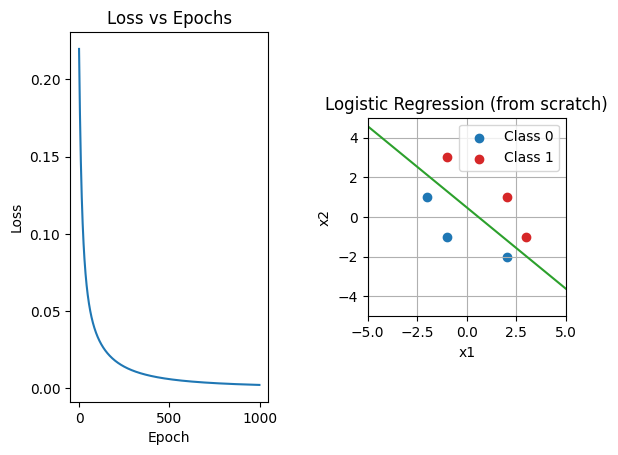

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------#

class LogReg():
  # Constructor, runs when a new model (object) is created
  def __init__(self):
    # Generate random initial weights and bias [-1, 1]
    self.theta_0 = random.uniform(-1, 1)
    self.theta_1 = random.uniform(-1, 1)
    self.theta_2 = random.uniform(-1, 1)
    # Learning rate
    self.lr = 0.05
    # Loss history
    self.loss_history = []

  # Calculates the weighted sum
  # z = θ0 + θ1x1 + θ2x2
  def weighted_sum(self, X):
    return self.theta_0 + self.theta_1 * X.T[0] + self.theta_2 * X.T[1]

  # Sigmoid Function (activation function)
  # σ(z) = 1/(1 + e^-z)
  def sigmoid(self, z):
    return 1/(1 + np.exp(-z))

  # Mean Squared Error (loss function)
  # Loss = mean(y - y_pred)^2     (of all datapoints)
  def MSE(self, y, y_pred):
    # Calculate error
    error = y - y_pred
    # Square error
    squared_error = np.power(error, 2)
    # Return the mean of the squared errors
    return np.mean(squared_error)

  # Calculates gradients (derivatives) of loss with respect to each parameter
  def compute_gradients(self, X, y, y_pred):
    dtheta_0 = np.mean(-(y - y_pred))               #dL/dθ0
    dtheta_1 = np.mean(-(y - y_pred) * X.T[0])      #dL/dθ1
    dtheta_2 = np.mean(-(y - y_pred) * X.T[1])      #dL/dθ2
    return dtheta_0, dtheta_1, dtheta_2

  # Fits the model to the dataset by iteratively updating parameters down the loss gradient
  def fit(self, X, y):
    for epoch in range(1000):

      # Find weighted sum of every data point in X
      z = self.weighted_sum(X)

      # Plug z into sigmoid function to obtain predictions
      y_pred = self.sigmoid(z)

      # Find the model's loss
      loss = self.MSE(y, y_pred)
      self.loss_history.append(loss)

      # Calculate gradients with respect to each weight and bias
      dtheta_0, dtheta_1, dtheta_2 = self.compute_gradients(X, y, y_pred)

      # Update weights and biases (θnew = θold - learning_rate * dL/dθ)
      self.theta_0 -= self.lr * dtheta_0
      self.theta_1 -= self.lr * dtheta_1
      self.theta_2 -= self.lr * dtheta_2

#------------------------------------------------#

# Data

# Input features
X = np.array(
    [[-2, 1],
     [-1, 3],
     [-1, -1],
     [2, -2],
     [2, 1],
     [3, -1]])

# Target classes
y = np.array([0, 1, 0, 0, 1, 1])

#------------------------------------------------#

# Create Logistic Regression model
model = LogReg()

# Fit the model to the data
model.fit(X, y)

#------------------------------------------------#

# Plotting

fig, axs = plt.subplots(nrows=1, ncols=2)

# Separate the dataset by class
data = zip(X, y)
classes = {0: [], 1: []}
for x_i, y_i in data:
  classes[y_i].append(x_i)
# Plot the data
axs[1].scatter(*np.array(classes[0]).T, color='tab:blue', label='Class 0')
axs[1].scatter(*np.array(classes[1]).T, color='tab:red', label='Class 1')

# Plot loss history
axs[0].set_title('Loss vs Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].plot(range(len(model.loss_history)), model.loss_history)

# Plot the line decision boundary
x1_np = np.linspace(-5, 5)
# Calculate x2
x2_np = (-model.theta_0 - model.theta_1 * x1_np) / model.theta_2
axs[1].plot(x1_np, x2_np, color='tab:green')

# Adjust the plot
plt.subplots_adjust(wspace=0.5)
axs[1].set_title('Logistic Regression (from scratch)')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_xlim([-5, 5])
axs[1].set_ylim([-5, 5])
axs[1].set_aspect('equal')
axs[1].legend()
axs[1].grid()

# Display the plot
plt.show()
